## This notebook is for Linear stability analysis of the circuit, and uses the search result from parameter search in the preliminary analysis. In the previous one, $b_i$, $V_i$, $\mu_i$, $K_{Ai}$, $K_{Bi}$ and $K_{Ci}$ are taken the same. 

![Circute 3954](3954.png "Circute 3954")

## Here, we extend the search by starting from these points.

In [1]:
%config Completer.use_jedi = False
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Latex

from tqdm import tqdm

import sys
sys.path.append("/end/home/rh2310/morpho_repo/amplitude_method")
from utils import *

In [2]:
init_printing(use_latex='mathjax')#(use_latex=True)

#### Define a list of parameters

In [3]:
A, B, C = symbols('A, B, C', real=True, positive = True)

D_A, D_B = symbols('D_A, D_B', real=True, positive = True)

(b_A, b_B, b_C,
 V_A, V_B, V_C,
K_AA, K_AB, K_AC, K_BA, K_BC, K_CB, K_CC,
μ_A, μ_B, μ_C) = symbols(
    'b_A, b_B, b_C, V_A, V_B, V_C, K_AA, K_AB, K_AC, K_BA, K_BC, K_CB, K_CC, mu_A, mu_B, mu_C', 
    real=True, positive = True)

k, n = symbols('k, n', integer=True)

> The PDEs are as follows

<h3><center>$
     \frac{\partial A}{\partial t} = b_A  +   V_A  \frac{1}{1+\left(\frac{K_{AA}}{A }\right)^{n}} \frac{1}{1+\left(\frac{B}{K_{BA} }\right)^{n}} -  \mu_A A + D_A \nabla^2 A,
$</center></h3>

<h3><center>$     \frac{\partial B}{\partial t} = b_B  +   V_B  \frac{1}{1+\left(\frac{K_{AB}}{A }\right)^{n}} \frac{1}{1+\left(\frac{C}{K_{CB} }\right)^{n}} -  \mu_B B + D_B \nabla^2 B,
$</center></h3>

<h3><center>$
\frac{\partial C}{\partial t} = b_C  +   V_C  \frac{1}{1+\left(\frac{A}{K_{AC} }\right)^{n}} \frac{1}{1+\left(\frac{B}{K_{BC} }\right)^{n}} \frac{1}{1+\left(\frac{K_{CC}}{C }\right)^{n}} -  \mu_C C,
$</center></h3>

![Circute 3954](3954.png "Circute 3954")

Then, we define kinetic terms as

<h3><center>$f_A(A, B, C) = b_A  +   V_A  \frac{1}{1+\left(\frac{K_{AA}}{A }\right)^{n}} \frac{1}{1+\left(\frac{B}{K_{BA} }\right)^{n}} -  \mu_A A$</center></h3>
<h3><center>$f_B(A, B, C) = b_B  +   V_B  \frac{1}{1+\left(\frac{K_{AB}}{A }\right)^{n}} \frac{1}{1+\left(\frac{C}{K_{CB} }\right)^{n}} -  \mu_B B$</center></h3>
<h3><center>$f_C(A, B, C) = b_C  +   V_C  \frac{1}{1+\left(\frac{A}{K_{AC} }\right)^{n}} \frac{1}{1+\left(\frac{B}{K_{BC} }\right)^{n}} \frac{1}{1+\left(\frac{K_{CC}}{C }\right)^{n}} -  \mu_C C$</center></h3>


In [4]:
def act(x, K, n):
    return 1/(1 + (K/x)**n)

def inh(x, K, n):
    return 1/(1 + (x/K)**n)


fA = b_A + V_A*act(A, K_AA, n)*inh(B, K_BA, n) - μ_A * A
fB = b_B + V_B*act(A, K_AB, n)*inh(C, K_CB, n) - μ_B * B
fC = b_C + V_C*inh(A, K_AC, n)*inh(B, K_BC, n)*act(C, K_CC, n) - μ_C * C

lprint(r"$f_A(A, B, C) =$ {0}", fA)
lprint(r"$f_B(A, B, C) =$ {0}", fB)
lprint(r"$f_C(A, B, C) =$ {0}", fC)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### which as a vector, we can define it like

In [6]:
Kinetic = Matrix([[fA], [fB], [fC]])
lprint(r"$\boldsymbol{f}(A, B, C) =$ {0} ", Kinetic)

<IPython.core.display.Latex object>

# Load the parameters that we found for the following assumptions:
> <center>$     b_A = b_B = b_C, $</center>
> <center>$     V_A = V_B = V_C, $</center>
> <center>$     \mu_A = \mu_B = \mu_C, $</center>
> <center>$     K_{AA} = K_{AB} = K_{AC}, $</center>
> <center>$     K_{BA} = K_{BC}, $</center>
> <center>$     K_{CB} = K_{CC}. $</center>

In [63]:
with open('turing_parameters_same_b_v_mu.npy', 'rb') as f:
    turing_parameters_pre = np.load(f)

# Case 1

> create a combination of parameters $(\theta_A, \theta_B, \theta_C)$, such that each $\theta_i$ is selected from the load dataset.

In [101]:
from itertools import combinations
params = []
for theta_A, theta_B, theta_C in combinations(turing_parameters_pre, 3):
    (n_val, b_A_val, mu_A_val, V_A_val, K_AA_val,_, _) = theta_A
    n_val = int(n_val)
    (_, b_B_val, mu_B_val, V_B_val, K_AB_val, K_BA_val, K_CB_val) = theta_B
    (_, b_C_val, mu_C_val, V_C_val, K_AC_val,K_BC_val, K_CC_val) = theta_C
    params.append(
        (n_val, 
         b_A_val, mu_A_val, V_A_val, K_AA_val, K_AB_val, K_AC_val,
         b_B_val, mu_B_val, V_B_val, K_BA_val, K_BC_val,
         b_C_val, mu_C_val, V_C_val, K_CB_val, K_CC_val))
    
    

In [102]:
len(params)

19131795

#### First, we find the fix points of the system without diffusion. 


The solution of the above system finds $A^*, B^*, C^*$ such that
<center>$f_A(A^*, B^*, C^*) = 0$</center>
<center>$f_B(A^*, B^*, C^*) = 0$</center>
<center>$f_C(A^*, B^*, C^*) = 0$</center>

In [103]:
f1 = lambdify([n, b_A, μ_A, V_A, K_AA, K_AB, K_AC,
               b_B, μ_B, V_B, K_BA, K_BC,
               b_C, μ_C, V_C, K_CB, K_CC,
               A,B,C], 
               fA,
              modules='numpy')

f2 = lambdify([n, b_A, μ_A, V_A, K_AA, K_AB, K_AC,
               b_B, μ_B, V_B, K_BA, K_BC,
               b_C, μ_C, V_C, K_CB, K_CC,
               A,B,C], 
              fB,
              modules='numpy')

f3 = lambdify([n, b_A, μ_A, V_A, K_AA, K_AB, K_AC,
               b_B, μ_B, V_B, K_BA, K_BC,
               b_C, μ_C, V_C, K_CB, K_CC,
               A,B,C], 
               fC,
              modules='numpy')

def create_func(n, b_A, μ_A, V_A, K_AA, K_AB, K_AC,
               b_B, μ_B, V_B, K_BA, K_BC,
               b_C, μ_C, V_C, K_CB, K_CC):
    def f_1(args):
        A,B,C = args
        return (f1(n, b_A, μ_A, V_A, K_AA, K_AB, K_AC,
                   b_B, μ_B, V_B, K_BA, K_BC,
                   b_C, μ_C, V_C, K_CB, K_CC, A,B,C),
                f2(n, b_A, μ_A, V_A, K_AA, K_AB, K_AC,
                   b_B, μ_B, V_B, K_BA, K_BC,
                   b_C, μ_C, V_C, K_CB, K_CC, A,B,C),
                f3(n, b_A, μ_A, V_A, K_AA, K_AB, K_AC,
                   b_B, μ_B, V_B, K_BA, K_BC,
                   b_C, μ_C, V_C, K_CB, K_CC, A,B,C)) 
    
    return f_1

#### Next, to linearise the PDE system, we find the Jacobian of $(f_A, f_B, f_C)$ 

In [104]:
J_jac = Kinetic.jacobian([A, B, C])
hprint(r"J= \frac{\partial \boldsymbol{f}_i}{\partial u_j} = ", J_jac)
J_jac_func = lambdify([n, b_A, μ_A, V_A, K_AA, K_AB, K_AC,
                       b_B, μ_B, V_B, K_BA, K_BC,
                       b_C, μ_C, V_C, K_CB, K_CC, A,B,C], 
                       J_jac,
              modules='numpy')

<IPython.core.display.Latex object>

In [106]:
from scipy.optimize import fsolve
from scipy.linalg import eigvals
from itertools import product  

count_unstable = 0
count_unstable_g = 0
count_supper_stable = 0
failed_roots = 0

valid_roots = []
valid_parameters = []
valid_jacobians = []
valid_eigenvals = []

invalid_roots = []
invalid_parameters = []

for i  in tqdm(range(len(params))):
    (n_val, 
     b_A_val, mu_A_val, V_A_val, K_AA_val, K_AB_val, K_AC_val,
     b_B_val, mu_B_val, V_B_val, K_BA_val, K_BC_val,
     b_C_val, mu_C_val, V_C_val, K_CB_val, K_CC_val) = params[i]
    
    func = create_func(n_val, 
                       b_A_val, mu_A_val, V_A_val, K_AA_val, K_AB_val, K_AC_val,
                       b_B_val, mu_B_val, V_B_val, K_BA_val, K_BC_val,
                       b_C_val, mu_C_val, V_C_val, K_CB_val, K_CC_val)
    #
    roots, d, ier, msg = fsolve(func, [10, 10, 10], xtol=1e-10, maxfev=100000,  full_output=1)
    # check the solution is valid
    (a_1, b_1, c_1) = func(roots)
    if ier != 1 or a_1 > 1e-8 or b_1 > 1e-8 or c_1 > 1e-8 :
        roots, d, ier, msg = fsolve(func, [-1, -1, -1], xtol=1e-10, maxfev=100000,  full_output=1)
        # check the solution is valid
        (a_1, b_1, c_1) = func(roots)
        if ier != 1 or a_1 > 1e-8 or b_1 > 1e-8 or c_1 > 1e-8 :
            failed_roots += 1
            invalid_roots.append(roots)
            invalid_parameters.append(
                (n_val, 
                 b_A_val, mu_A_val, V_A_val, K_AA_val, K_AB_val, K_AC_val,
                 b_B_val, mu_B_val, V_B_val, K_BA_val, K_BC_val,
                 b_C_val, mu_C_val, V_C_val, K_CB_val, K_CC_val))
            continue

    J_test = J_jac_func(n_val, 
                        b_A_val, mu_A_val, V_A_val, K_AA_val, K_AB_val, K_AC_val,
                        b_B_val, mu_B_val, V_B_val, K_BA_val, K_BC_val,
                        b_C_val, mu_C_val, V_C_val, K_CB_val, K_CC_val,
                        A = roots[0], B = roots[1], C = roots[2])
    
    r1 = J_test[0, 0] + np.abs(J_test[0, 1]) + np.abs(J_test[0, 2])
    r2 = J_test[1, 1] + np.abs(J_test[1, 0]) + np.abs(J_test[1, 2])
    r3 = J_test[2, 2] + np.abs(J_test[2, 0]) + np.abs(J_test[2, 1])        
    l1 = J_test[0, 0] - np.abs(J_test[0, 1]) - np.abs(J_test[0, 2])
    l2 = J_test[1, 1] - np.abs(J_test[1, 0]) - np.abs(J_test[1, 2])
    l3 = J_test[2, 2] - np.abs(J_test[2, 0]) - np.abs(J_test[2, 1])  
    
    if l1 > 0 and l2 > 0 and l3 >0 :
        count_unstable_g += 1
        continue
        
    if r1 < 0 and r2 <0 and r3<0:
        count_supper_stable += 1
        continue
        
    eigen_vals = eigvals(J_test)    
    if np.any(np.real(eigen_vals > 0)):
        count_unstable += 1
        continue
        
        
    
    
    valid_roots.append(roots)
    valid_parameters.append((n_val, 
                             b_A_val, mu_A_val, V_A_val, K_AA_val, K_AB_val, K_AC_val,
                             b_B_val, mu_B_val, V_B_val, K_BA_val, K_BC_val,
                             b_C_val, mu_C_val, V_C_val, K_CB_val, K_CC_val))
    valid_jacobians.append(J_test)
    valid_eigenvals.append(eigen_vals)    
            


100%|██████████| 19131795/19131795 [2:22:25<00:00, 2238.89it/s]  


In [107]:
failed_roots

2422910

In [108]:
total = len(params)
print(f"Of total {total} parameters :")
print("Original:",count_unstable, f" {100*count_unstable/total:.2f}%")
print("Unstable Gershgoring:",count_unstable_g, f" {100*count_unstable_g/total:.2f}%")
print("Supper stable Gershgoring:",count_supper_stable, f" {100*count_supper_stable/total:.2f}%")
print("--")
print("Original leftovers:",total-count_unstable)
print("Unstable G leftovers:",total-count_unstable_g)
print("Supper stable leftovers:",total-count_supper_stable)
print("Total leftovers:",len(valid_parameters))

Of total 19131795 parameters :
Original: 887979  4.64%
Unstable Gershgoring: 0  0.00%
Supper stable Gershgoring: 5490055  28.70%
--
Original leftovers: 18243816
Unstable G leftovers: 19131795
Supper stable leftovers: 13641740
Total leftovers: 10330851


In [109]:
valid_roots[0]

array([5.18443660e-01, 2.68180009e+01, 1.00000000e-02])

## Including the diffusion

In [110]:
J_jac_diff = J_jac - Matrix([[D_A*k**2, 0,        0], 
                             [0,        D_B*k**2, 0],
                             [0,        0,        0],
                           ])
hprint(r"J_{diff}= ", J_jac_diff)

J_jac_diff_func = lambdify([n, b_A, μ_A, V_A, K_AA, K_AB, K_AC,
                            b_B, μ_B, V_B, K_BA, K_BC,
                            b_C, μ_C, V_C, K_CB, K_CC, A,B,C], 
               J_jac_diff,
              modules='numpy')

<IPython.core.display.Latex object>

In [285]:
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm


ks = np.linspace(0.00001,10, 50).astype(np.complex64)
D_A_val=.01
D_B_val=1

#dispersions = np.zeros((params.shape[0], 3, ks.shape[0])).astype(np.complex64)
#dispersions = np.zeros((params.shape[0], ks.shape[0])).astype(np.complex64)
turing_dispersions = []
turing_parameters = []
turing_parameters_index = []
non_turing_dispersions = []
non_turing_parameters = []
non_turing_parameters_index = []

for i  in tqdm(range(len(valid_parameters))[::100]):#tqdm(range(len(valid_parameters)-10300000)):
        
    (n_val, 
     b_A_val, mu_A_val, V_A_val, K_AA_val, K_AB_val, K_AC_val,
     b_B_val, mu_B_val, V_B_val, K_BA_val, K_BC_val,
     b_C_val, mu_C_val, V_C_val, K_CB_val, K_CC_val) = valid_parameters[i]    
    
    #indices.append(i)
    λ_1, λ_2, λ_3 = list(J_jac_diff.subs(
                          {n:n_val, 
                           b_A:b_A_val, 
                           μ_A:mu_A_val, 
                           V_A:V_A_val,
                           K_AA:K_AA_val, 
                           K_AB:K_AB_val,  
                           K_AC:K_AC_val,
                           b_B:b_B_val, 
                           μ_B:mu_B_val, 
                           V_B:V_B_val,
                           K_BA:K_BA_val, 
                           K_BC:K_BC_val,  
                           b_C:b_C_val, 
                           μ_C:mu_C_val, 
                           V_C:V_C_val,
                           K_CB:K_CB_val, 
                           K_CC:K_CC_val,  
                           A:valid_roots[i][0], 
                           B:valid_roots[i][1], 
                           C:valid_roots[i][2]}
                     ).eigenvals().keys())
    
    λ_1_func = lambdify([k, D_A, D_B], 
                         λ_1,
                         modules='numpy')
    λ_2_func = lambdify([k, D_A, D_B], 
                         λ_2,
                         modules='numpy')
    λ_3_func = lambdify([k, D_A, D_B], 
                         λ_3,
                         modules='numpy')
    dis1 = λ_1_func(ks, D_A_val, D_B_val)
    def check_type(item):
        return not isinstance(item, float) and not isinstance(item, int)
    
    if check_type(dis1):
        dis1[np.isinf(np.real(dis1))] = -100
    
    dis2 = λ_2_func(ks, D_A_val, D_B_val)
    if check_type(dis2):
        dis2[np.isinf(np.real(dis2))] = -100
    
    dis3 = λ_3_func(ks, D_A_val, D_B_val)
    if check_type(dis2):
        dis3[np.isinf(np.real(dis3))] = -100
    #
    if check_type(dis1) and np.any(np.real(dis1) > 0):
        turing_parameters_index.append(i)
        turing_dispersions.append(dis1)
        turing_parameters.append(valid_parameters[i])
    elif check_type(dis2) and np.any(np.real(dis2) > 0):
        turing_parameters_index.append(i)
        turing_dispersions.append(dis2)
        turing_parameters.append(valid_parameters[i])
    elif check_type(dis3) and np.any(np.real(dis3) > 0):
        turing_parameters_index.append(i)
        turing_dispersions.append(dis3)
        turing_parameters.append(valid_parameters[i])
    else:
        non_turing_parameters_index.append(i)
        non_turing_dispersions.append(dis1)
        non_turing_parameters.append(valid_parameters[i])

100%|██████████| 103309/103309 [9:48:21<00:00,  2.93it/s]  


In [286]:
len(turing_parameters)

7486

## Because of low resolution of $k$, there are some dispersion relations with only one positive numbers. I remove them from the candidates. 

In [287]:
turing_dispersions2 = []
turing_parameters2 = []
turing_parameters_index2 = []

ks2 = np.linspace(0.0,10, 1000).astype(np.complex64)


for i  in tqdm(range(len(turing_parameters))):
        
    dis = turing_dispersions[i]
    # Make sure they are not unsatable for k=0
    if np.count_nonzero(np.real(dis) > 0)  > 1:
        turing_parameters_index2.append(turing_parameters_index[i])
        turing_dispersions2.append(dis)
        turing_parameters2.append(turing_parameters[i])
    

100%|██████████| 7486/7486 [00:00<00:00, 221584.75it/s]


In [288]:
len(turing_parameters2)

7275

In [289]:
with open('turing_parameters.npy', 'wb') as f:
    np.save(f, turing_parameters2)
    
with open('turing_disp.npy', 'wb') as f:
    np.save(f, turing_parameters2)    

In [359]:
def find_roots(n_val, 
               b_A_val, mu_A_val, V_A_val, K_AA_val, K_AB_val, K_AC_val,
               b_B_val, mu_B_val, V_B_val, K_BA_val, K_BC_val,
               b_C_val, mu_C_val, V_C_val, K_CB_val, K_CC_val):
    func = create_func(n_val, 
                       b_A_val, mu_A_val, V_A_val, K_AA_val, K_AB_val, K_AC_val,
                       b_B_val, mu_B_val, V_B_val, K_BA_val, K_BC_val,
                       b_C_val, mu_C_val, V_C_val, K_CB_val, K_CC_val)
    #
    roots, d, ier, msg = fsolve(func, [10, 10, 10], xtol=1e-10, maxfev=100000,  full_output=1)
    (a_1, b_1, c_1) = func(roots)
    if ier != 1 or a_1 > 1e-8 or b_1 > 1e-8 or c_1 > 1e-8 :
        roots, d, ier, msg = fsolve(func, [-1, -1, -1], xtol=1e-10, maxfev=100000,  full_output=1)
        # check the solution is valid
        (a_1, b_1, c_1) = func(roots)
        if ier != 1 or a_1 > 1e-8 or b_1 > 1e-8 or c_1 > 1e-8 :
            raise exception(msg)
        return roots
    #print(msg)
    return roots

def get_dispersions(ks, 
                    n_val, 
                    b_A_val, mu_A_val, V_A_val, K_AA_val, K_AB_val, K_AC_val,
                    b_B_val, mu_B_val, V_B_val, K_BA_val, K_BC_val,
                    b_C_val, mu_C_val, V_C_val, K_CB_val, K_CC_val):
    
    A_star, B_star, C_star = find_roots(n_val, 
     b_A_val, mu_A_val, V_A_val, K_AA_val, K_AB_val, K_AC_val,
     b_B_val, mu_B_val, V_B_val, K_BA_val, K_BC_val,
     b_C_val, mu_C_val, V_C_val, K_CB_val, K_CC_val)
    #print(A_star, B_star, C_star)
    λ_1, λ_2, λ_3 = list(J_jac_diff.subs(
                          {n:n_val, 
                           b_A:b_A_val, 
                           μ_A:mu_A_val, 
                           V_A:V_A_val,
                           K_AA:K_AA_val, 
                           K_AB:K_AB_val,  
                           K_AC:K_AC_val,
                           b_B:b_B_val, 
                           μ_B:mu_B_val, 
                           V_B:V_B_val,
                           K_BA:K_BA_val, 
                           K_BC:K_BC_val,  
                           b_C:b_C_val, 
                           μ_C:mu_C_val, 
                           V_C:V_C_val,
                           K_CB:K_CB_val, 
                           K_CC:K_CC_val,  
                           A:A_star, 
                           B:B_star, 
                           C:C_star}
                     ).eigenvals().keys())
    
    λ_1_func = lambdify([k, D_A, D_B], 
                         λ_1,
                         modules='numpy')
    λ_2_func = lambdify([k, D_A, D_B], 
                         λ_2,
                         modules='numpy')
    λ_3_func = lambdify([k, D_A, D_B], 
                         λ_3,
                         modules='numpy')
    
    def check_type(item):
        return not isinstance(item, float) and not isinstance(item, int)
    
    dis1 = λ_1_func(ks, D_A_val, D_B_val)
#     if check_type(dis1):
#         dis1[np.isinf(np.real(dis1))] = -100
#         dis1[np.isnan(dis1)] = 0
    
    dis2 = λ_2_func(ks, D_A_val, D_B_val)
#     if check_type(dis2):
#         dis2[np.isinf(np.real(dis2))] = -100
#         dis2[np.isnan(dis2)] = 0
    
    dis3 = λ_3_func(ks, D_A_val, D_B_val)
#     if check_type(dis2):
#         dis3[np.isinf(np.real(dis3))] = -100
#         dis3[np.isnan(dis3)] = 0
    #print(dis1)    
    return dis1, dis2,dis3



4
0.001 0.1 5.0 0.5 0.5 0.001
0.001 0.1 5.0 10.0 0.5
0.001 5.0 50.0 1.0 5.0


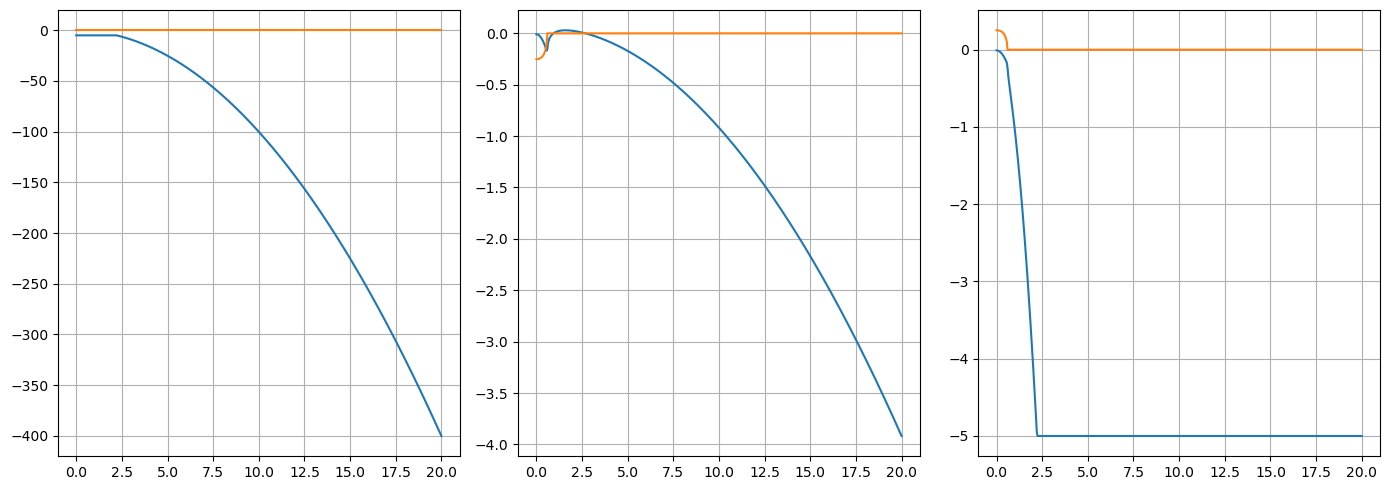

In [364]:
index = 1
(n_val, 
b_A_val, mu_A_val, V_A_val, K_AA_val, K_AB_val, K_AC_val,
b_B_val, mu_B_val, V_B_val, K_BA_val, K_BC_val,
b_C_val, mu_C_val, V_C_val, K_CB_val, K_CC_val) = turing_parameters2[index]
print(n_val)
print(b_A_val, mu_A_val, V_A_val, K_AA_val, K_AB_val, K_AC_val)
print(b_B_val, mu_B_val, V_B_val, K_BA_val, K_BC_val)
print(b_C_val, mu_C_val, V_C_val, K_CB_val, K_CC_val)
ks = np.linspace(0.001, 20, 500).astype(np.complex128)
dis1, dis2, dis3=get_dispersions(ks, n_val, 
b_A_val, mu_A_val, V_A_val, K_AA_val, K_AB_val, K_AC_val,
b_B_val, mu_B_val, V_B_val, K_BA_val, K_BC_val,
b_C_val, mu_C_val, V_C_val, K_CB_val, K_CC_val)
plt.figure(figsize=(14,5))
plt.subplot(131)
plt.plot(ks, np.real(dis1))
plt.plot(ks, np.imag(dis1))
#plt.xlim([0,3])
#plt.ylim([-.2, .2])
plt.grid()
plt.subplot(132)
plt.plot(ks, np.real(dis2))
plt.plot(ks, np.imag(dis2))
#plt.xlim([0,3])
#plt.ylim([-.2, .2])
plt.grid()
plt.subplot(133)
plt.plot(ks, np.real(dis3))
plt.plot(ks, np.imag(dis3))
#plt.xlim([0,3])
#plt.ylim([-.2, .2])
plt.grid();plt.tight_layout();plt.show()

In [94]:
import sys
from pathlib import Path
sys.path.append(f"{Path.home()}/morpho_repo/turing_codebase")
from pde_solvers.cn import *

In [384]:
model_128 = RD_2D_1st_Order(Ds=[D_A_val, D_B_val, 0], N=64*2500, T=1600, Lx=10, Ly=10, 
                            Ix=2*32, Jy=2*32,
                        boundary_condition=Neumann_Boundary_2D
                       #boundary_condition=Periodic_Boundary_2D
                       # boundary_condition=Diritchlet_Boundary_2D
                       )

In [381]:
(n_val, 
     b_A_val, mu_A_val, V_A_val, K_AA_val, K_AB_val, K_AC_val,
     b_B_val, mu_B_val, V_B_val, K_BA_val, K_BC_val,
     b_C_val, mu_C_val, V_C_val, K_CB_val, K_CC_val) = turing_parameters3[index]
def kinetics(A,B,C):    
    fA_v = b_A_val + V_A_val*act(A, K_AA_val, n_val)*inh(B, K_BA_val, n_val) - mu_A_val * A
    fB_v = b_A_val + V_A_val*act(A, K_AA_val, n_val)*inh(C, K_CB_val, n_val) - mu_A_val * B
    fC_v = b_A_val + V_A_val*inh(A, K_AA_val, n_val)*inh(B, K_BA_val, n_val)*act(C, K_CB_val, n_val) - mu_A_val * C
    return (fA_v, fB_v, fC_v)

def find_roots():
    func = create_func(n_val, 
                       b_A_val, mu_A_val, V_A_val, K_AA_val, K_AB_val, K_AC_val,
                       b_B_val, mu_B_val, V_B_val, K_BA_val, K_BC_val,
                       b_C_val, mu_C_val, V_C_val, K_CB_val, K_CC_val)
    #
    roots, d, ier, msg = fsolve(func, [-1, -1, -1], xtol=1e-10, maxfev=100000,  full_output=1)
    print(msg)
    return roots
A_star, B_star, C_star = find_roots()
print(A_star, B_star, C_star)
#A_128 = np.random.normal(scale=star_vals[Turing_indices[index], 0]*.1, size=(model_128.Ix*model_128.Jy))
A_128 = np.random.normal(scale=A_star*.1, size=(model_128.Ix*model_128.Jy))
A_128 += A_star
#B_128 = np.random.normal(scale=star_vals[Turing_indices[index], 1]*.1, size=(model_128.Ix*model_128.Jy))
B_128 = np.random.normal(scale=B_star*.1, size=(model_128.Ix*model_128.Jy))
B_128 += B_star
#C_128 = np.random.normal(scale=star_vals[Turing_indices[index], 2]*.1, size=(model_128.Ix*model_128.Jy))
C_128 = np.random.normal(scale=C_star*.1, size=(model_128.Ix*model_128.Jy))
C_128 += C_star

The solution converged.
0.5184436568083446 26.81800088974129 9.999999999999999e-05


In [385]:
res_128 = model_128.integrate([A_128,B_128,C_128],kinetics, 1)

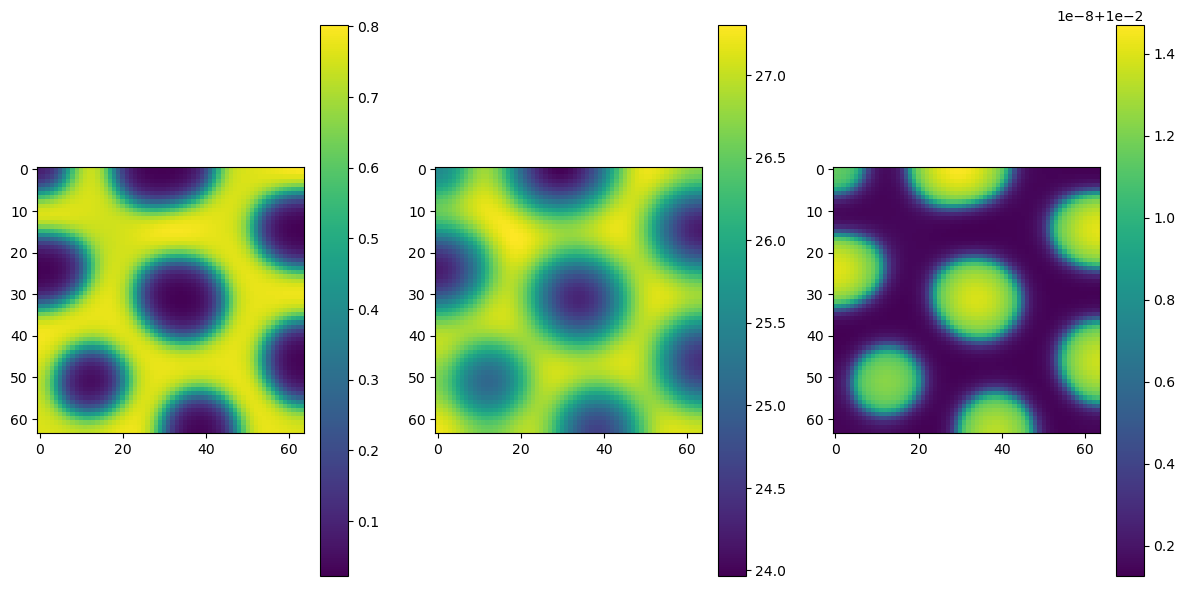

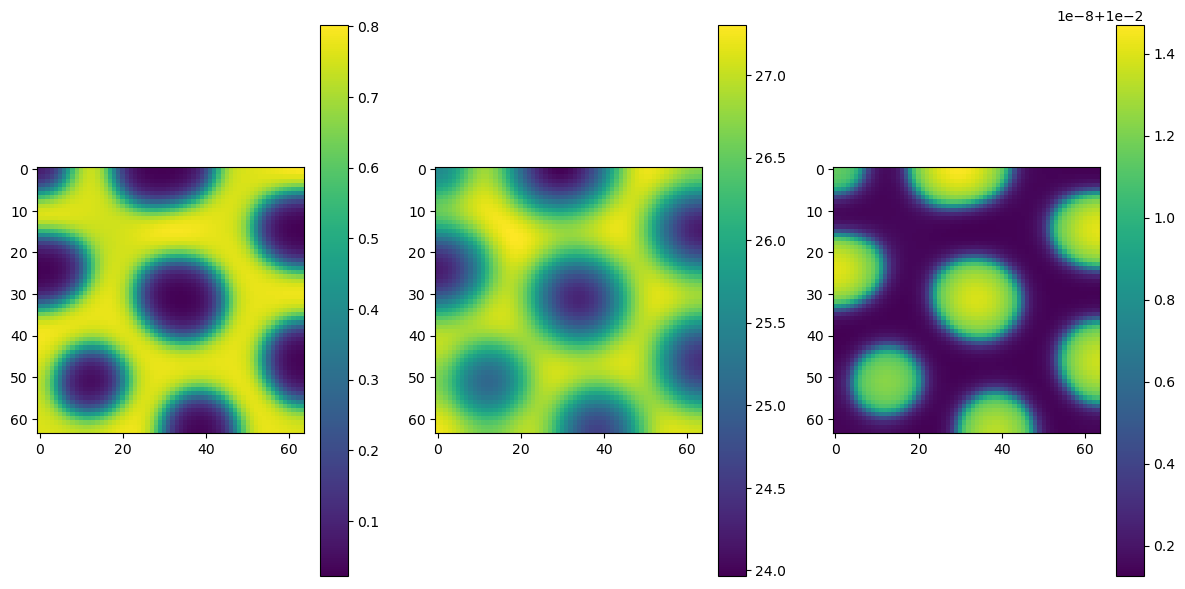

In [386]:
plt.figure(figsize=(12,6))
plt.subplot(131)
plt.imshow((res_128[-1, 0, :]).reshape(model_128.Ix, model_128.Jy))
plt.colorbar()
plt.subplot(132)
plt.imshow((res_128[-1, 1, :]).reshape(model_128.Ix, model_128.Jy))
plt.colorbar()
plt.subplot(133)
plt.imshow((res_128[-1, 2, :]).reshape(model_128.Ix, model_128.Jy))
plt.colorbar()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
plt.subplot(131)
plt.imshow((res_128[-500, 0, :]).reshape(model_128.Ix, model_128.Jy))
plt.colorbar()
plt.subplot(132)
plt.imshow((res_128[-500, 1, :]).reshape(model_128.Ix, model_128.Jy))
plt.colorbar()
plt.subplot(133)
plt.imshow((res_128[-500, 2, :]).reshape(model_128.Ix, model_128.Jy))
plt.colorbar()
plt.tight_layout()
plt.show()